<!--NOTEBOOK_HEADER-->
*This notebook contains course material from [CBE 40455 Process Operations](http://jckantor.github.io/CBE40455/) by 
Jeffrey Kantor (jeff at nd.edu); the content is available [on GitHub](https://github.com/jckantor/CBE40455/).
The text is released under the [CC-BY-NC-ND-4.0 license](https://creativecommons.org/licenses/by-nc-nd/4.0/legalcode), 
and code is released under the [MIT license](https://opensource.org/licenses/MIT).*


<!--NAVIGATION-->
< [Getting Started with Gurobi](http://nbviewer.jupyter.org/github/jckantor/CBE40455/blob/master/notebooks/01.02-Getting-Started-with-Gurobi.ipynb) | [Contents](toc.ipynb) | [Getting Started with Pandas](http://nbviewer.jupyter.org/github/jckantor/CBE40455/blob/master/notebooks/01.04-Getting-Started-with-Pandas.ipynb) ><p><a href="https://colab.research.google.com/github/jckantor/CBE40455/blob/master/notebooks/01.03-Getting-Started-with-GNU-MathProg.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>

# Getting Started with GNU MathProg in Jupyter Notebooks

This notebook describes the installation and use of GLPK/MathProg from within a [Jupyter notebook](http://jupyter.org/).

#### Table of Contents

* [GNU MathProg is a Mathematical Programming Language](#GNU-MathProg-is-a-Mathematical-Programming-Language)
* [Installing GLPK/MathProg to Run from a Jupyter Notebook](#Installing-GLPK/MathProg-to-Run-from-a-Jupyter-Notebook)
* [Specifying Input Files for MathProg](#Specifying-Input-Files-for-MathProg)
* [Redirecting MathProg Output](#Redirecting-MathProg-Output)
* [Working with MathProg Tables](#Working)
* [Simple Scripting](#Simple-Scripting)

## GNU MathProg is a Mathematical Programming Language

GNU MathProg is a mathematical programming languages designed for the purpose of writing applications of mixed-integer linear programming in a concise, high-level, maintainable manner with sufficient detail to be translated and solved using optimization software.

Since the introduction of [GAMS](http://www.gams.com/) (the General Algebraic Modeling System) in the late 1970's, a number of succesful languages have been produced including [AIMMS](http://business.aimms.com/), [AMPL](http://www.ampl.com/), [LINDO/LINGO](http://www.lindo.com/), [MPL](http://www.maximalsoftware.com/), [XPRESS-MOSEL](http://www.fico.com/en/products/fico-xpress-optimization-suite/), and others.  Of these, AMPL is the most widely adopted language for university training.

[GNU MathProg](http://en.wikibooks.org/wiki/GLPK/GMPL_(MathProg) provides a significant subset of the AMPL language roughly equivalent to the version of AMPL distributed in the early 1990's and described in the [AMPL book](http://www.ampl.com/BOOK/download.html). Though a component of the open source [GNU GLPK project](http://www.gnu.org/software/glpk/) for linear programming, the MathProg interface is also available for other solvers including [lpsolve](http://lpsolve.sourceforge.net/5.5/MathProg.htm) and COIN-OR CBC. MathProg can export models formats compatiable with most commercial and non-commericial solvers for mixed-integer linear programs.

## Installing GLPK/MathProg to Run from a Jupyter Notebook

You will need to obtain a working copy of GLPK to run the code cells in the following tutorial. Here some recommendations.

### In the Cloud

This notebook is part of collection of notebooks available in the github repository [CBE40455](https://github.com/jckantor/CBE40455).  This collection can be opened directly in a Docker container on [mybinder.org](http://mybinder.org). Click on this button 

[![Binder](http://mybinder.org/badge.svg)](http://mybinder.org/repo/jckantor/CBE40455)

[mybinder.org](http://mybinder.org) provides a live version of notebook that can be run, edited, and downloaded for your use under terms of the Creative Commons License. Unfortunately, persistent file storage is not available through this service, so you need to be sure and download any changes or new notebooks that you may create.

### Google Colaboratory

In [0]:
!apt-get install glpk-utils -qq



### On your Laptop

Assuming you have downloaded and installed a version of Jupyter notebooks (either Continuum Analytics [Anaconda](https://www.continuum.io/downloads) or [Enthought Canopy](https://store.enthought.com/downloads/#default)), the next step is to install a version of GLPK.

1. For Windows/PC hardware, the [Windows for GLPK web site](http://winglpk.sourceforge.net/) maintains a pre-compiled version of GLPK based on the lastest official release. Test your GLPK installation by executing the `glpsol` version command in a terminal window.
```
glpsol -v
```

2. For MacOS users, the most convenient installation process is to use a package manager. If you are not already doing so, you may consider installing the excellect [Homebrew package manager](http://brew.sh/) using the instructions on their homepage. The basic instruction is to open a terminal window (open the file browser go to the directory Applications/Utilities then click on `Terminal`), then execute this command:
```
ruby -e "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install)"
```
After Homebrew is installed, GLPK can be installed with two commands in the terminal window:
```
  brew tap homebrew/science
  brew install glpk
```
Test your GLPK installation by executing the `glpsol` version command in a terminal window.
```
glpsol -v
```

### Testing 

If GLPK has been installed correctly on your machine then you should be able to execute the following command from within a Jupyter notebook.. Test this before going further with this tutorial.

In [2]:
%%script glpsol -m /dev/stdin

printf "Hello, World\n";
end;

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 -m /dev/stdin
Reading model section from /dev/stdin...
3 lines were read
Hello, World
Model has been successfully generated
GLPK Simplex Optimizer, v4.65
0 rows, 0 columns, 0 non-zeros
~     0: obj =   0.000000000e+00  infeas =  0.000e+00
OPTIMAL SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.0 Mb (41595 bytes)


## Running GLPK/MathProg from Code Cells

Jupyter notebooks have a special set of ['magic' commands](http://nbviewer.ipython.org/github/ipython/ipython/blob/master/examples/notebooks/Cell%20Magics.ipynb) that are used to specify Jupyter behavior, to interact with the computational environment, or to provide help. Magic commands begin with a `%`, `!`, or `?`, and extend over a single line (a 'line magic') or over a whole code cell (a 'cell magic').

The following code cell demonstrates the use of the use of the `%%script` cell magic to run a MathProg model. The first line of the code cell is

`%%script glpsol -m /dev/stdin` 

which tells Jupyter to run the [`glpsol -m`](http://en.wikibooks.org/wiki/GLPK/Using_GLPSOL) command reading the remaining lines of the cell as MathProg input. The `-m /dev/stdin` part is a `glpsol` option directs `glpsol` to accept MathProg input from the standard input. For the `%%script` command, the standard input consists of the remaining lines in the code cell. Output from the command is displayed in the cell output.

In [3]:
%%script glpsol -m /dev/stdin

param a := 12.3;
param b := 13.0;

var x >= 0;
var y >= 0;

s.t. Ca : 2*x + 3*y <= a;
s.t. Cb : 3*x + 1*y <= b;

maximize obj: x + y;
solve;
display x,y;
   
end;

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 -m /dev/stdin
Reading model section from /dev/stdin...
15 lines were read
Generating Ca...
Generating Cb...
Generating obj...
Model has been successfully generated
GLPK Simplex Optimizer, v4.65
3 rows, 2 columns, 6 non-zeros
Preprocessing...
2 rows, 2 columns, 4 non-zeros
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  3.000e+00  ratio =  3.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 2
*     0: obj =  -0.000000000e+00 inf =   0.000e+00 (2)
*     2: obj =   5.371428571e+00 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.1 Mb (102251 bytes)
Display statement at line 13
x.val = 3.81428571428571
y.val = 1.55714285714286
Model has been successfully processed


## Specifying Input Files for MathProg

The `glpsol` command can read a MathProg model from a file with a `.mod` suffix, and can read MathProg data from multiple files with a `.dat` suffix. Here we show how to incorporate this functionality within a Jupyter notebook.

To start, let's save a simple MathProg model into a `.mod` file using the `%%writefile` cell magic. A previously created subdirectory `tmp` is used to store the model file.

In [4]:
%%writefile ExampleModel.mod

# model section
param a;
param b;

var x >= 0;
var y >= 0;

subject to Ca: 3.0*x + 4.0*y <= a;
subject to Cb: 4.0*x + 2.0*y <= b;

maximize obj: x + y;
solve;
printf "x = %6.3f\n", x;
printf "y = %6.3f\n", y;

end;

Overwriting ExampleModel.mod


This model requires at a data section to specify values for the parameters `a` and `b`. The next cell shows how to read the data section from the standard input (which consists of the subsequent lines of the code cell) using `-d` argument of the `glpsol` command.

In [5]:
%%script glpsol -m ExampleModel.mod -d /dev/stdin

param a := 12.3;
param b := 10.4;

end;

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 -m ExampleModel.mod -d /dev/stdin
Reading model section from ExampleModel.mod...
ExampleModel.mod:17: warning: final NL missing before end of file
17 lines were read
Reading data section from /dev/stdin...
5 lines were read
Generating Ca...
Generating Cb...
Generating obj...
Model has been successfully generated
GLPK Simplex Optimizer, v4.65
3 rows, 2 columns, 6 non-zeros
Preprocessing...
2 rows, 2 columns, 4 non-zeros
Scaling...
 A: min|aij| =  2.000e+00  max|aij| =  4.000e+00  ratio =  2.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 2
*     0: obj =  -0.000000000e+00 inf =   0.000e+00 (2)
*     2: obj =   3.500000000e+00 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.1 Mb (102257 bytes)
x =  1.700
y =  1.800
Model has been successfully processed


An alternative approach is save the data into a data file, then run `glpsol` is run as a system command using options to specify separate model and data files.

In [6]:
%%writefile ExampleModel.dat
data;

param a := 12.3;
param b := 10.4;

end;

Overwriting ExampleModel.dat


In [7]:
!glpsol -m ExampleModel.mod -d ExampleModel.dat

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 -m ExampleModel.mod -d ExampleModel.dat
Reading model section from ExampleModel.mod...
ExampleModel.mod:17: warning: final NL missing before end of file
17 lines were read
Reading data section from ExampleModel.dat...
ExampleModel.dat:6: warning: final NL missing before end of file
6 lines were read
Generating Ca...
Generating Cb...
Generating obj...
Model has been successfully generated
GLPK Simplex Optimizer, v4.65
3 rows, 2 columns, 6 non-zeros
Preprocessing...
2 rows, 2 columns, 4 non-zeros
Scaling...
 A: min|aij| =  2.000e+00  max|aij| =  4.000e+00  ratio =  2.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 2
*     0: obj =  -0.000000000e+00 inf =   0.000e+00 (2)
*     2: obj =   3.500000000e+00 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.1 Mb (102257 bytes)
x =  1.700
y =  1.800
Model has been successfully pro

## Redirecting MathProg Output

The `glpsol` command generates six types of output while processing a MathProg model:

* **log**: A log showing the execution steps of `glpsol`, including reports of model syntax errors and solution status. This is always sent to standard output. The `--log filename` writes a copy of the log to a specified file.
* **display**: The output of MathProg `display` or `printf` commands. By default this is sent to standard output, but may be redirected using the `glpsol -y filename` option.
* **plain text solution**: This is a generic, human readable solution report that is generated only if the `glpsol -o filename` option is set.
* **machine solution**: This is a machine readable solution report generated by the `glpsol -w filename` option. The main use of this option is break up the post-processing of a solution into modular parts.
* **table**: The `MathProg` `table` commmand provides a method for writing data to specified files and database connectors, including `.csv` formats.
* **errors**: Abnormal exits from `glpsol` are always report on standard error.


| Mathprog Output | default | redirect |
| -- | -- |
| **log** | /dev/stdout | --log filename (copy) |
| **display, printf** | /dev/stdout | `-y filename` |
| **table**| | specified in table command|
| **plain text solution** | | `-o filename` |
| **binary solution** | | `-w filename` |
| **errors** | /dev/stderr | ` ` |



* --out redirect stdout
* --err redirect err output


In [0]:
%%script --out output glpsol -m ExampleModel.mod -d /dev/stdin -y out.txt

data;

param a := 12.3;
param b := 10.4;

end;

The `-y out.txt` option redirects display output to the file `out.txt`. The file can be read and displayed using the usual python methods as shown here:

In [9]:
def readfile(fname):
    f = open('out.txt')
    s = f.read()
    f.close()
    return s

print(readfile('out.txt'))

x =  1.700
y =  1.800



The `--out output` is an option passed to script that redirects normal cell output to a python variable `output`. This will contain the remaining output of the `glpsol` command which can be displayed as follows:

In [10]:
print(output)

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 -m ExampleModel.mod -d /dev/stdin -y out.txt
Reading model section from ExampleModel.mod...
ExampleModel.mod:17: warning: final NL missing before end of file
17 lines were read
Reading data section from /dev/stdin...
7 lines were read
Generating Ca...
Generating Cb...
Generating obj...
Model has been successfully generated
GLPK Simplex Optimizer, v4.65
3 rows, 2 columns, 6 non-zeros
Preprocessing...
2 rows, 2 columns, 4 non-zeros
Scaling...
 A: min|aij| =  2.000e+00  max|aij| =  4.000e+00  ratio =  2.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 2
*     0: obj =  -0.000000000e+00 inf =   0.000e+00 (2)
*     2: obj =   3.500000000e+00 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.1 Mb (110552 bytes)
Model has been successfully processed



If things went well we should see a line `OPTIMAL LP SOLUTION FOUND` along with additional information that is useful in tuning larger models for efficient solution.  If things didn't go well, an appropriate message will be displayed indicating a model processing error or a problems in finding a numerical solution.

In this case `glpsol` says an optimal solution was found. The next step is to show the displayed results that were written to the file `out.txt`.

## Working with MathProg Tables

The MathProg `table` statement is a flexible tool for interfacing MathProg models with data sources and accessing the results generated by a MathProg model. 

### Reading and Writing Data from .csv Files

The `.csv` file format is commonly used to exchange data with spreadsheet and databases. The following MathProg example demonstrates reading and writing model data to`.csv` files.

The example problem is to minimize the cost of a diet. The input data consists of three tables of data containing the cost of the available foods, dialy nutritional data, and the nutritional content of the foods. The data is taken from [http://www.neos-guide.org/content/diet-problem](http://www.neos-guide.org/content/diet-problem)

The next demonstrates the use of the `pandas` library to create a data series of food costs, then writing the data to a `.csv` file.

In [0]:
import pandas

cost = pandas.Series([0.18, 0.23, 0.05], name='Cost', index = ['Corn','2% Milk','Wheat Bread'])
cost.to_csv('cost_data.csv',index_label='Food',header=True)

Printing the file confirms that it has been saved in the desired format.

In [12]:
f = open('cost_data.csv')
print(f.read())
f.close()

Food,Cost
Corn,0.18
2% Milk,0.23
Wheat Bread,0.05



The next two cells use the `writefile` cell magic to directly enter the nutritional data in `.csv` format. (Note that there is no space following the comma separating data fields.)

In [13]:
%%writefile nutr_data.csv
Nutrient,Min,Max
Vitamin A,5000,50000
Calories,2000,2250

Overwriting nutr_data.csv


In [14]:
%%writefile food_data.csv
Food,Nutrient,Amount
Corn,Vitamin A,107
Corn,Calories,72
2% Milk,Vitamin A,500
2% Milk,Calories,121
Wheat Bread,Vitamin A,0
Wheat Bread,Calories,65

Overwriting food_data.csv


In [0]:
%%script glpsol -m /dev/stdin -y food.txt --out output

set FOODS;
param cost{FOODS};
table cdata IN "CSV" "cost_data.csv":
    FOODS <- [Food], cost~Cost;

set NUTRIENTS;
param nMin{NUTRIENTS};
param nMax{NUTRIENTS};
table ndata IN "CSV" "nutr_data.csv":
    NUTRIENTS <- [Nutrient], nMin~Min, nMax~Max;

set S dimen 2;
param amt{S} default 0;
table ndata IN "CSV" "food_data.csv":
    S <- [Food, Nutrient], amt~Amount;
    
param xMax := 10;
    
var x{FOODS} >= 0;

minimize TotalCost : sum{f in FOODS} cost[f]*x[f];
    
subject to A {n in NUTRIENTS}: sum{f in FOODS} amt[f,n]*x[f] >= nMin[n];
subject to B {n in NUTRIENTS}: sum{f in FOODS} amt[f,n]*x[f] <= nMax[n];
subject to C {f in FOODS}: x[f] <= xMax;
    
solve;

table out {f in FOODS} OUT "CSV" "food_opt.csv":
    f~Food, x[f]~Servings;

printf "%15s",'FOOD';
printf "%10s",'Servings';
printf "%6s",'COST';
for {n in NUTRIENTS}:
        printf "%12s", n;
printf "\n";
for {f in FOODS}:{
    printf "%15s",f;
    printf "%10.2f", x[f];
    printf "%6.2f",cost[f];
    for {n in NUTRIENTS}:
        printf "%12d", amt[f,n];
    printf "\n";
}
printf "\n%31s",'Min';
for {n in NUTRIENTS}:
        printf "%12d", nMin[n];
printf "\n";
printf "%31s",'Max';
for {n in NUTRIENTS}:
        printf "%12d", nMax[n];
printf "\n";
printf "\n%21s",'TOTALS';
printf "%10.2f",TotalCost.val;
for {n in NUTRIENTS}:
        printf "%12d", sum{f in FOODS} amt[f,n]*x[f];
printf "\n";

end;


In [16]:
print(open('food.txt').read())

           FOOD  Servings  COST   Vitamin A    Calories
           Corn      1.94  0.18         107          72
        2% Milk     10.00  0.23         500         121
    Wheat Bread     10.00  0.05           0          65

                            Min        5000        2000
                            Max       50000        2250

               TOTALS      3.15        5208        2000



,Servings
Food,
Corn,1.944444
2% Milk,10.000000
Wheat Bread,10.000000


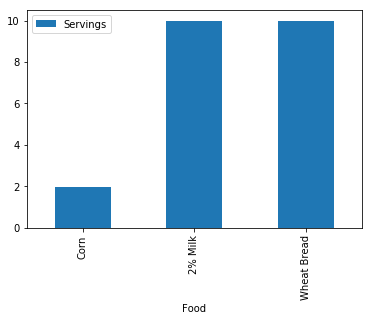

In [17]:
from IPython.display import display
%matplotlib inline

results = pandas.read_csv("food_opt.csv",index_col=0)
display(results)
results.plot(kind='bar');

### MathProg implementation of Geometric Brownian Motion

The following MathProg model generates realizations of geometric Brownian motion. By itself, this fragment includes no optimization and, by itselft, is an unlikely application of MathProg. But it does show how stochastic processes can be incorporated into MathProg models and the use of tables with multiple indices. 

Geometric Brownian motion in continous-time is described by the stochastic differential equation

$$ dS = \mu S(t) dt + \sigma S(t) dW $$

where $dW$ is a Wiener process. In the case where the model corresponds to the price dynamics of a financial asset, $\mu$ corresponds to mean annual return and $\sigma$ to mean annual volatility. By Ito's lemma,

$$ d\ln S = \left(\mu-\frac{\sigma^2}{2}\right) dt + \sigma dW $$

In discrete-time, the Euler-Maruyama approximation is given by

$$\ln S(t+\Delta t) = \ln S(t) + \left(\mu-\frac{\sigma^2}{2}\right) \Delta t + \sqrt{\Delta t} \ Z(0,1)$$

where $Z(0,1)$ is a Normally distributed random number with zero-mean and unit variance. Values of $S(k)$ are computed as

$$S(k\Delta t) = S(0) \exp\left((\mu-\frac{\sigma^2}{2}) k \Delta t + \sigma\sqrt{\Delta t}\sum_{j=1}^{k} Z_j\right)$$

The following MathProg example creates realizations of the process using MathProg `param` statements. The parameters `mu` and `sigma` represent annualized average return and volatility for a typical financial asset from an equity market. A three-year simulation horizon is specified by the parameter `T`. The simulation time step `dT` corresponds to a trading day assuming there are 252 trading days in a calendar year. Parameter `N` indicates the number of realizations to calculate. 


In [0]:
%%script --out output glpsol -m /dev/stdin -y /dev/stdout

# annualized sigma and mu
param mu := 0.05;
param sigma := 0.30;

# simulation horizon in trading days
param dT := 1/252.0;
param T := 3/dT;

# number of realizations
param N := 10;
    
# model for geometric brownian motion
param Z{k in 1..T, n in 1..N} := Normal(0,1);
param S{k in 0..T, n in 1..N} := 
    100.0*exp((mu-0.5*sigma**2)*k*dT + sigma*sqrt(dT)*(sum{j in 1..k} Z[j,n]));

# write results to a table indexed by t and n
table price {t in 0..T, n in 1..N} OUT "CSV" "price.csv" : t, n, S[t,n]~S;
    
end;

In [19]:
print(output)

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 -m /dev/stdin -y /dev/stdout
Reading model section from /dev/stdin...
21 lines were read
Writing price...
Model has been successfully generated
GLPK Simplex Optimizer, v4.65
0 rows, 0 columns, 0 non-zeros
~     0: obj =   0.000000000e+00  infeas =  0.000e+00
OPTIMAL SOLUTION FOUND
Time used:   0.0 secs
Memory used: 2.2 Mb (2275526 bytes)



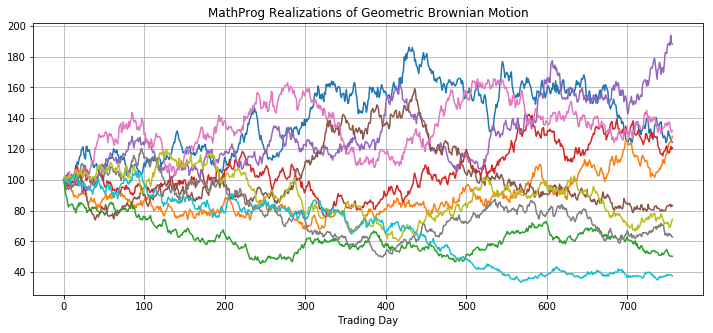

In [20]:
import pandas
import matplotlib.pyplot as plt
%matplotlib inline
price = pandas.read_csv("price.csv")

plt.figure(figsize=(12,5))

for n in range(price['n'].min(),price['n'].max()+1):
    t = price['t'].loc[price['n']==1]
    S = price['S'].loc[price['n']==n]
    plt.plot(t,S)

plt.title('MathProg Realizations of Geometric Brownian Motion')
plt.xlabel('Trading Day')
plt.grid(True)


<!--NAVIGATION-->
< [Getting Started with Gurobi](http://nbviewer.jupyter.org/github/jckantor/CBE40455/blob/master/notebooks/01.02-Getting-Started-with-Gurobi.ipynb) | [Contents](toc.ipynb) | [Getting Started with Pandas](http://nbviewer.jupyter.org/github/jckantor/CBE40455/blob/master/notebooks/01.04-Getting-Started-with-Pandas.ipynb) ><p><a href="https://colab.research.google.com/github/jckantor/CBE40455/blob/master/notebooks/01.03-Getting-Started-with-GNU-MathProg.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>